In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv("RegularseasonDetailedResults.csv")

In [3]:
df.shape

(71241, 34)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71241 entries, 0 to 71240
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Season  71241 non-null  int64 
 1   Daynum  71241 non-null  int64 
 2   Wteam   71241 non-null  int64 
 3   Wscore  71241 non-null  int64 
 4   Lteam   71241 non-null  int64 
 5   Lscore  71241 non-null  int64 
 6   Wloc    71241 non-null  object
 7   Numot   71241 non-null  int64 
 8   Wfgm    71241 non-null  int64 
 9   Wfga    71241 non-null  int64 
 10  Wfgm3   71241 non-null  int64 
 11  Wfga3   71241 non-null  int64 
 12  Wftm    71241 non-null  int64 
 13  Wfta    71241 non-null  int64 
 14  Wor     71241 non-null  int64 
 15  Wdr     71241 non-null  int64 
 16  Wast    71241 non-null  int64 
 17  Wto     71241 non-null  int64 
 18  Wstl    71241 non-null  int64 
 19  Wblk    71241 non-null  int64 
 20  Wpf     71241 non-null  int64 
 21  Lfgm    71241 non-null  int64 
 22  Lfga    71241 non-null

In [38]:
x=df.iloc[:,[0,1,2,3,4,5,6,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33]]
y=df.iloc[:,7]
#splitting independent and dependent variables

In [39]:
from sklearn.preprocessing import LabelEncoder               #changing datatype
le=LabelEncoder()
df['Wloc']=le.fit_transform(df['Wloc'])


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71241 entries, 0 to 71240
Data columns (total 34 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Season  71241 non-null  int64
 1   Daynum  71241 non-null  int64
 2   Wteam   71241 non-null  int64
 3   Wscore  71241 non-null  int64
 4   Lteam   71241 non-null  int64
 5   Lscore  71241 non-null  int64
 6   Wloc    71241 non-null  int64
 7   Numot   71241 non-null  int64
 8   Wfgm    71241 non-null  int64
 9   Wfga    71241 non-null  int64
 10  Wfgm3   71241 non-null  int64
 11  Wfga3   71241 non-null  int64
 12  Wftm    71241 non-null  int64
 13  Wfta    71241 non-null  int64
 14  Wor     71241 non-null  int64
 15  Wdr     71241 non-null  int64
 16  Wast    71241 non-null  int64
 17  Wto     71241 non-null  int64
 18  Wstl    71241 non-null  int64
 19  Wblk    71241 non-null  int64
 20  Wpf     71241 non-null  int64
 21  Lfgm    71241 non-null  int64
 22  Lfga    71241 non-null  int64
 23  Lfgm3   712

In [41]:
from sklearn.model_selection import train_test_split   #further splitting into train and test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [42]:
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state =5,max_depth=2)
decision_tree.fit(x_train, y_train)
predictvalues =decision_tree.predict(x_test)

predictvalues

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [43]:
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.metrics import accuracy_score
accuracy_score (y_test,predictvalues)

0.9408379535405993

In [32]:
#KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier    #libraries
from sklearn.metrics import accuracy_score

In [34]:
knn = KNeighborsClassifier(n_neighbors=1000)         

In [35]:
knn.fit(x_train, y_train)                             #training

KNeighborsClassifier(n_neighbors=1000)

In [36]:
accuracy_test = accuracy_score(y_test, knn.predict(x_test))      #testing accuracy

In [37]:
print ('Test_data Accuracy: %.2f' %accuracy_test)

Test_data Accuracy: 0.94


In [17]:
#GRAPH of decision tree

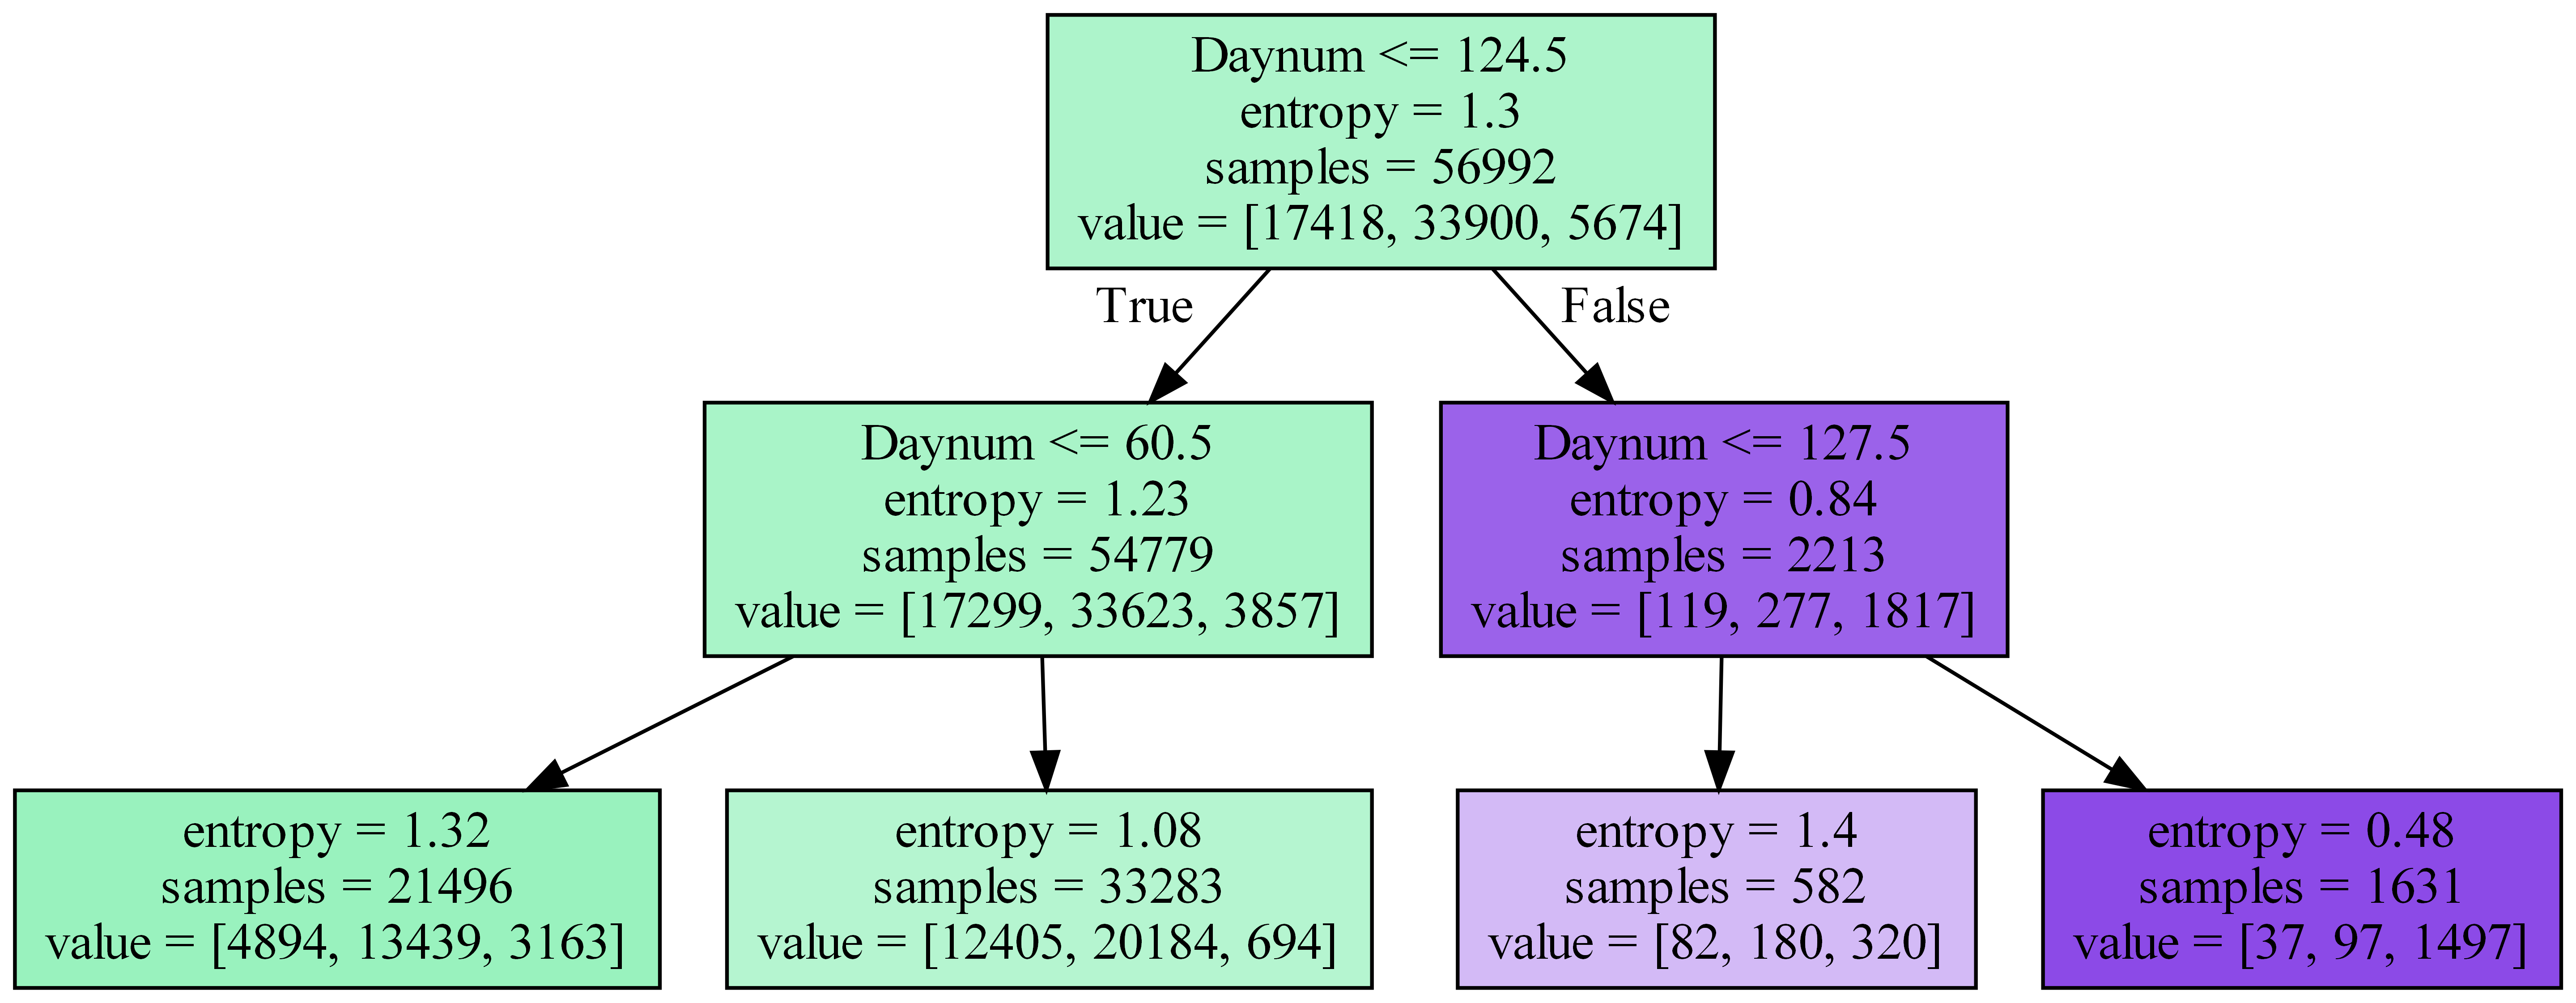

In [18]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(decision_tree, out_file='tree.dot', feature_names = x.columns,rounded = False, proportion = False, precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [44]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2,random_state = 100)
from sklearn.tree import DecisionTreeClassifier
decision_tree = DecisionTreeClassifier(criterion = "entropy", random_state = 100,max_depth=6)
decision_tree.fit(x_train, y_train)
predictValues =decision_tree.predict(x_test)
from sklearn import metrics
import numpy as np
from sklearn.metrics import mean_squared_error
from math import sqrt
#print("RMSE is:-")

#print(np.sqrt(metrics.mean_squared_error(y_test, predictValues)))

from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictValues)

0.9413292160853394